# **Heart Disease prediction using Machine Learning**

We're going to use various python based ML & Data Science libraries in order to build a Machine learning Model capable of predicting whether a patient has heart disease, based on the medical data of the patient.

We'll use **Supervised machine learning** as the data we've is labelled.

We'll use the following steps to define our workflow:

1. **Problem definition :** What's the problem, it's type in ML & what we have to get as output.
2. **Data :** Look into the data we've, it's source, properties etc.
3. **Target (Success) :** What is success for us, what level of results we wanted from our model.
4. **Features :** Look into the Features **(predicting variables)**, what's necessary etc.
5. **Modelling :** It includes a number of things.
    * Get the data ready for the model, Explore and preprocess it.
    * Get the best base model for our data & problem, it is generally recursive approach.
    * Evaluate our model on various metrics & with different techniques.
    * Quantify the model's performance, as results.
6. **Experimentation :** The overall Process is very experimental, we've to try different things & determine the best output for us.

At the end **ML is all about Experimentation.**

<img src="./Images/Steps.png" width=1000>

## **Let's tackle the steps:**


## **1. Problem :**

In a statement,
> Given clinical attributes of a patient, can we predict whether the patient has any heart disease or not?

The problem is a **ML Binary Classification** problem i.e. we've to determine whether a patient belongs to diseased group or not!

## **2. Data :**

> The original data comes from UCI Machine Learning Repo, Cleveland data [repository](https://archive.ics.uci.edu/dataset/45/heart+disease).

There is also a Kaggle Notebook of the dataset for more details [here](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data).

## **3. Target | Success**

We're building a model to predict whether a patient has heart disease or not!.

**medical** predictions are really **crucial**, We will target a **95% or over** prediction accuracy for our model to be used in Production.

## **4. Features Understanding**

Here, the dataset is **already curated** & have all **14 important features** present.

**The Data Dictionary**, what the columns mean!


A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).


1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


---
## **5. modelling**
### **Now, more specifically, we'll look at the following topics.**

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it. `(This should come in step-4)`
* **Data Preprocessing** - Get the data ready to be used in predictive modeling!
* **Base Model training** - create all potential model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a model's predictions using problem-specific evaluation metrics. 
* **Base Model comparison** - comparing several different base models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it? cross-validation?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Reporting what we've found** - if we had to present our work, what would we show someone?


| <img src="./images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |


### **Preparing the tools | Import statements**

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

Some of the imports are general in Classification Projects.

And the Models/Estimators we're importing are just for start, we can import what we needed later on.

In [1]:
# Importing expected tools we need.

# Regular EDA, data preprocessing and plotting libraries
import numpy as np  # Numerical methods
import pandas as pd  # Data manipulation & preprocessing
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # For other plotting.

# Expected useful Estimators/models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics and techniques.
from sklearn.metrics import (
    accuracy_score,
    classification_report,
)  # Classification model evaluators
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
)  # Splitting & cross validation
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
)  # hyperparameter tuning
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)  # Displaying metric results

# Plotting graphs inside the Notebook
%matplotlib inline

### **Import or Load the Data:**

In [2]:
# Importing the data into a Pandas DataFrame object.

heart_disease_df = pd.read_csv("./dataCSV/heart-disease.csv")

# Imported successfully!
heart_disease_df  # 303 rows & 14 columns.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### **Exploratory Data Analysis (EDA)**

To do anything next, we have to know our data well, here **EDA** comes handy, Data Exploration means exploring the data we have in a way
we can get better understanding of our data and it's structure.

Just refer back to the **data dictionary**, compare different columns with each other, with target to know there similarities, distinction & relation
more robustly.

Understand the Distribution of the Data Features, Outliers that may affect the predictions, also know what part of the data is missing from our data.
Which features are important, which can be removed, modified, or added to make our data more complete for the prediction.


**Since EDA has no set Methodology, we'll follow our own steps below :**

1. What questions we're answering, or trying the solve (or proof wrong)?
2. What kind of data we have, column data types, how we treat different data types?
3. what is missing from our data, how we'll tackle the missing data?
4. What is the shape of data, what are the columns, what they really mean?
5. Which columns contains outliers, they affect us? how to handle them?
6. Handle multiple features. Add, remove or change Features in our data.

**Let's begin the Exploration :**

In [3]:
# See the head of the data | First 5 rows.
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Shape of the data
heart_disease_df.shape
# We have 303 rows and 14 columns.

(303, 14)

In [5]:
# Types of data in each column, do they contain missing values?
heart_disease_df.info()

# As we can see, there's no missing value in any column.
# And all the columns are already in Numerical format (required)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Let's find out how many records belong to **Patients with heart disease** & how many to **without heart disease**.

We can have number of instances from each category in a categorical column.

In [6]:
# Let's find out how many records have Heart disease and how many not!!
heart_disease_df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

They are almost close, in this case our data is **Balanced** across classes. This is **idle situation for 
classification datasets**.

> In case of **Imbalanced data** i.e. data having more samples of a single category/class than another,
> our output can be affected, and **models tend to over fit certain class outputs than others**.

**Let's visualize the records belonging to each category :**

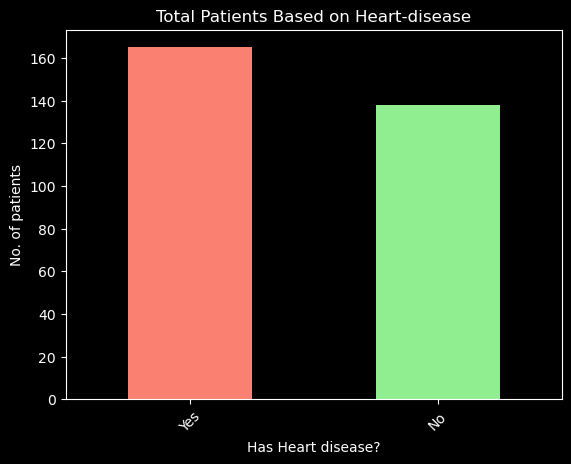

In [7]:
# Plot the value counts in a bar graph
heart_disease_df["target"].value_counts().plot.bar(
    color=["salmon", "lightgreen"],
    xlabel="Has Heart disease?",
    ylabel="No. of patients",
    title="Total Patients Based on Heart-disease",
)

plt.xticks(
    ticks=[0, 1], labels=["Yes", "No"], rotation=45
)  # Change the ticks and labels
plt.show()

Another way to get some quick statistic about our data is to use `.describe()`.

`.describe()` is used to get detailed statistic (min, max, sd etc.) about all the **Numeric columns** of the DataFrame.

In [8]:
# Quick Statistic about numeric columns (all Columns are numeric)
heart_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### **Let's compare different columns with different ones**

### **Heart Disease according to different Genders**

First let's see the ratio of genders in our DataSet.

In [9]:
# Let's count records per sex in our DataSet
heart_disease_df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: title={'center': 'Male-Female ratio in data'}, ylabel='count'>

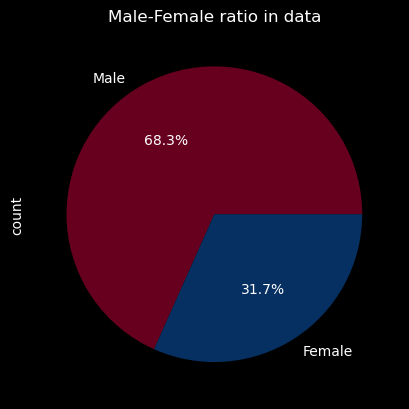

In [10]:
# Visualize the pie chart of different sexes in our DataSet.
heart_disease_df["sex"].value_counts().plot(
    kind="pie",
    labels=["Male", "Female"],
    title="Male-Female ratio in data",
    colormap="RdBu",
    autopct="%1.1f%%",
)
# Definitely, data contains lot's of Male records, so there tend to have more diseased males as compared to females.

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column. 

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [11]:
# Here, as male records are more than female records, data will contain more diseased males.

# Let's calculate a "Cross table" for our sex & target(heart-disease) column.
# It will count the numbers by default.
pd.crosstab(
    heart_disease_df["sex"],
    heart_disease_df["target"],
    margins=True,
    margins_name="Total",
)

target,0,1,Total
sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


What can we infer from this? Let's make a simple heuristic.

Since there are 96 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a **75% chance** she has heart disease.

As for males, there's 207 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, **45% of the time** he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's **a 60% chance** they have heart disease.

Of course, this is just probability based on collected sample data, this is just a basic estimate.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

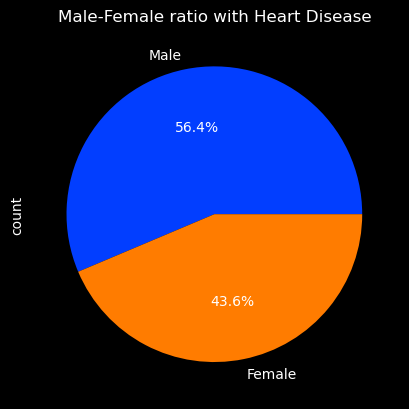

In [12]:
# Let's count gender (male or female) who has any "heart disease"
gender_with_heart_disease = (
    heart_disease_df[heart_disease_df.target == 1]
    .sex.value_counts()
    .plot.pie(
        labels=["Male", "Female"],
        colors=sns.color_palette("bright"),
        autopct="%1.1f%%",
        title="Male-Female ratio with Heart Disease",
    )
)

In [13]:
# So as expected, we have 56.4% diseased males and 43.6% diseased females total.
pd.crosstab(
    heart_disease_df["sex"],
    heart_disease_df["target"],
    margins=True,
    margins_name="Total",
)

target,0,1,Total
sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


* We can Even visualize the **diseased & non-diseased gender portions** with a **grouped bar chart.**

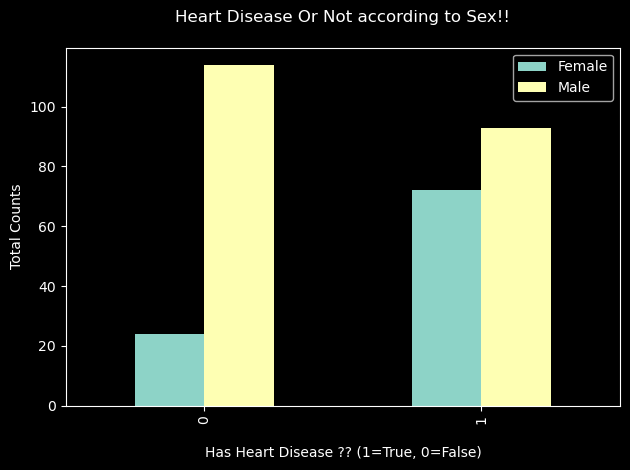

In [14]:
pd.crosstab(heart_disease_df["target"], heart_disease_df["sex"]).plot.bar(
    xlabel="\nHas Heart Disease ?? (1=True, 0=False)",
    ylabel="Total Counts",
    title="Heart Disease Or Not according to Sex!!\n",
)

plt.legend(["Female", "Male"])
plt.tight_layout()
plt.show()



### **Age Vs Max Heart Rate for Heart Disease**

Now, let's compare **AGE** & **thalach** (which is max heart rate) with the **target variable** !!

In [15]:
# Review the DataFrame.
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# What type of plot should we use??
# Let's first see all the different/unique values in the Age & thalach column!
print(
    f"\tUnique values\n Age : {heart_disease_df['age'].nunique()} | thalach: {heart_disease_df['thalach'].nunique()}"
)

	Unique values
 Age : 41 | thalach: 91


As we can see, there are too many distinct values for both **Age & thalach**, so to visualize all that records,

**bar plot** isn't that handy, instead we'll use **scatter plot** with colors to denote **diseased & non-diseased** person.

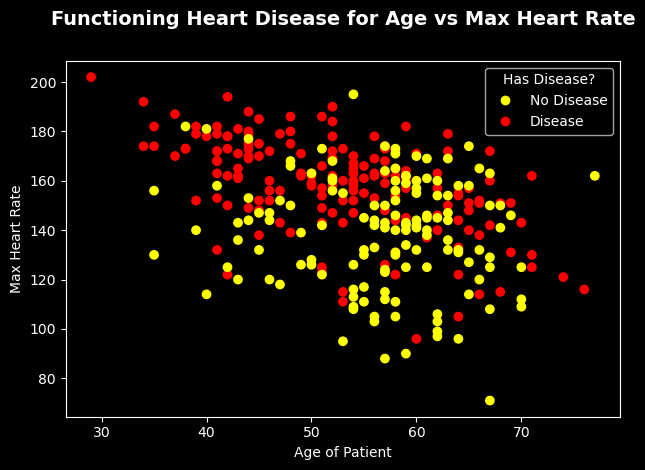

In [17]:
# Using matplotlib OO API for visualization

# Let's create a scatter plot,
# For Age Vs Thalach (Max Heart Rate)

from matplotlib.axes import Axes

ax: Axes  # For IDE Help

fig, ax = plt.subplots()

scatter = ax.scatter(
    x=heart_disease_df.age,  # Age on x-axis
    y=heart_disease_df.thalach,  # Max Heart Rate on y-axis
    c=heart_disease_df.target,  # Color based on target,
    cmap="autumn_r",  # Color map
)

# Customize the plot!
ax.set_title(
    "Functioning Heart Disease for Age vs Max Heart Rate\n",
    pad=10,
    weight="heavy",
    size=14,
)

ax.set_xlabel("Age of Patient")
ax.set_ylabel("Max Heart Rate")
fig.tight_layout()

# Adding legend.
ax.legend(
    *scatter.legend_elements()[:1], ["No Disease", "Disease"], title="Has Disease?"
)


plt.show()

All we can find from above **Scatter plot** is that -

- **Max Heart rate decreases** with the increase in **Age** of the patient.
- Our Age Distribution starts from approx 30 years.
- Patients with **low age and high max Heart Rate** have high chances of Heart Disease.

Now, let's look at the distribution of **"Age"** in our DataSet.

<Axes: title={'center': 'Age Distribution in Our Data'}, xlabel='Age of Patient', ylabel='Frequency'>

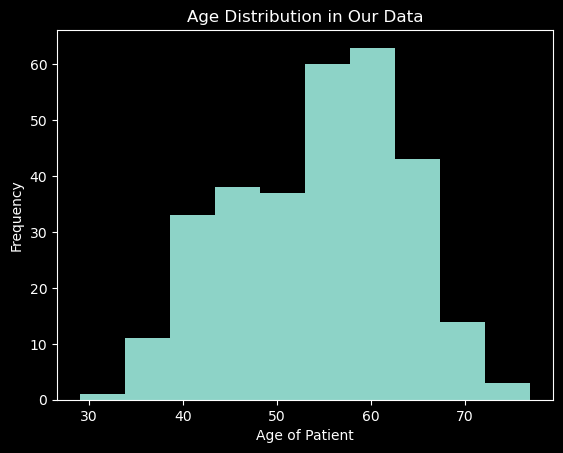

In [18]:
# Age Distribution.
heart_disease_df["age"].plot.hist(
    xlabel="Age of Patient", title="Age Distribution in Our Data"
)

# Our DatSet has more records of patients around 55-65 years old.

### **Heart Disease with respect to Chest Pain Level**
Now, we will plot **Chest Pain Vs Target** -

In [19]:
# Cross Tab for this two columns
pd.crosstab(heart_disease_df.cp, heart_disease_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


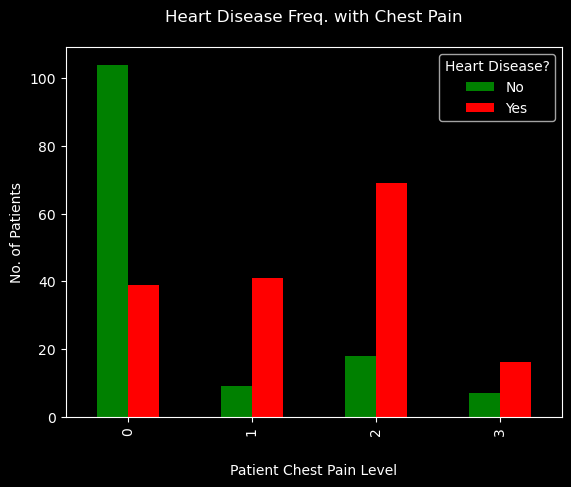

In [20]:
pd.crosstab(heart_disease_df.cp, heart_disease_df.target).plot.bar(
    color=["Green", "Red"],
    xlabel="Patient Chest Pain Level",
    ylabel="No. of Patients",
    title="Heart Disease Freq. with Chest Pain\n",
)

plt.xlabel("Patient Chest Pain Level", labelpad=20)
plt.legend(["No", "Yes"], title="Heart Disease?")

plt.show()

What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a **subject matter expert** (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems [even some medical professionals are confused by the term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/).

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

---

Now, we'll see the relationship between all the Features and the Target variable.

### **Correlation Matrix**

A correlation matrix is a Table showing **correlations among all the columns** of a DataFrame.

Now, what's correlation??

> In statistics, correlation is any statistical relationship between the two variables whether casual or not! <br>
> Correlation shows how related a column/variable is to the other.

Hence a **Correlation matrix** can give us an idea of how related a variable/Feature is to the target variable.

we can use `.corr()` method of Pandas DataFrame to get a correlation matrix.

In [21]:
# Using DataFrame's ".corr()" method for correlation matrix.
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


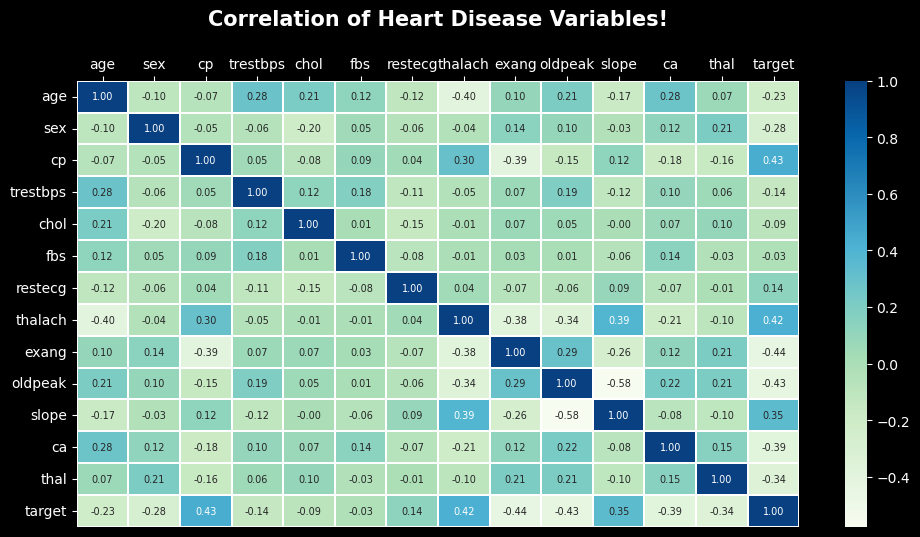

In [22]:
# Let's visualize it with seaborn's HeatMap
plt.figure(figsize=(10, 5))

corr = heart_disease_df.corr()  # Get our correlation matrix.

# Create a Heat map to show correlation matrix graphically.
sns.heatmap(
    corr,  # Data to plot
    linewidths=0.1,
    cmap="GnBu",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
)

plt.xticks(rotation=45)  # Rotate x-axis tick labels.
plt.gca().xaxis.tick_top()  # Get x-ticks to top!
plt.tight_layout()
plt.title(
    "Correlation of Heart Disease Variables!", pad=40, fontweight="bold", fontsize=15
)

plt.show()

As we know out data is already pre-processed and ready for modelling!

Still, let's see all Feature's Distribution to find Outliers and understand distributions as the *last step* of this **EDA**

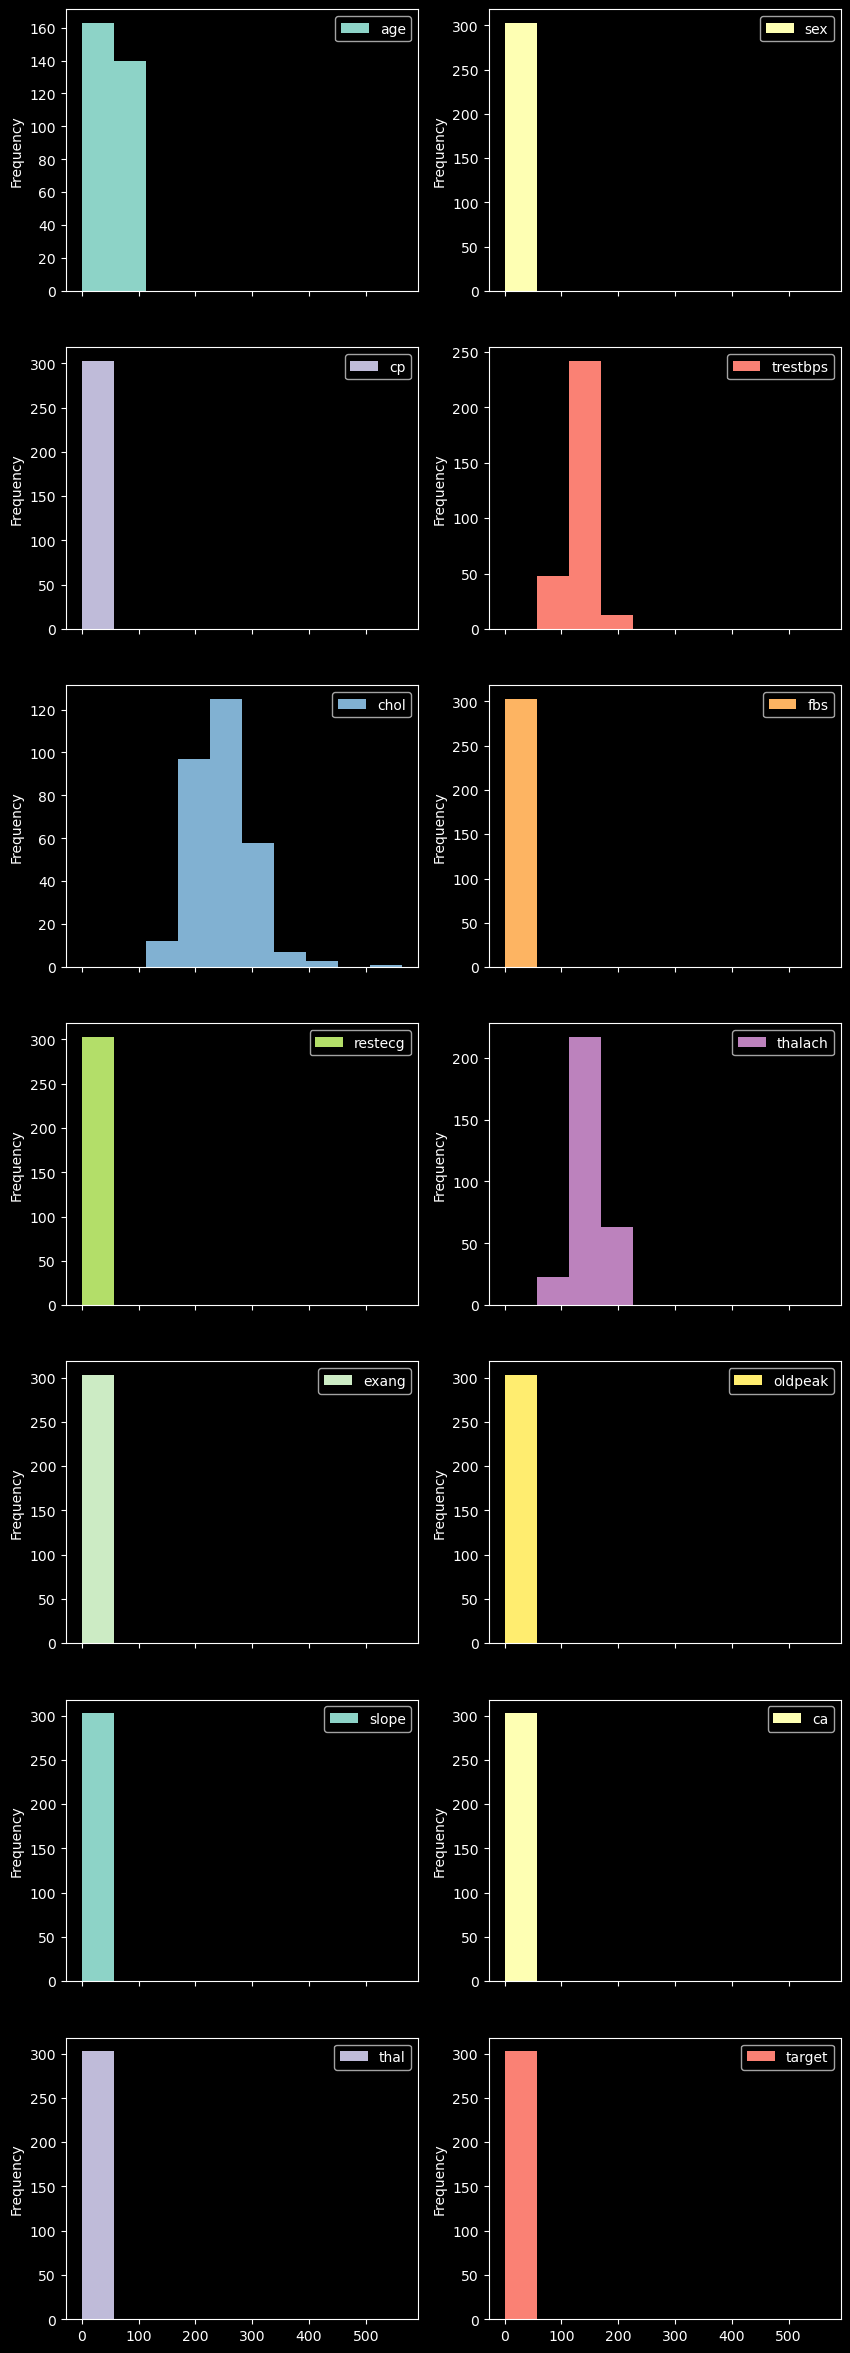

In [23]:
# Plotting histograms as subplots
heart_disease_df.plot.hist(subplots=True, layout=(7, 2), figsize=(10, 30))
plt.show()

# Clearly, we have no outliers.
# And most of the distributions are b/w 0 and 1

### Enough EDA, let's model

Remember, we do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using `sex`, the rest of the data seems to be pretty distributed.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

Let's build some models.

---

### Real Modelling starts here

We've explored out data, and it has no inconsistencies.<br>
Now we'll try to use ML to build a model that predicts our `target` (heart disease or not) using the 13 `independent` variables.

Remember our Problem statement - 
> Given clinical attributes of a patient, can we predict whether the patient has any heart disease or not?

And our aim | Evaluation metric is -
> If we achieve `>95%` accuracy at predicting whether the patient has any heart or not on unseen data, then we'll pursue the project.

So this is our aim.

And before we build/train our model, we need to get our **Dataset** ready.

Let's look at the dataset

In [24]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

let's split our dataset into X (Features) and y (target)

In [25]:
# Splitting the dataset into X and y

X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]


# 13 Features and 1 Output (dependent variable)
X.shape, y.shape

((303, 13), (303,))

In [26]:
# Let's see our X and y

# Features
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
# Target
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Now, for a reliable evaluation let's split our features and label into `training` and `testing` sets.

This is where you'll split your data into a **training set** and a **test set**.

We'll use our training set to train your model and test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

***Test set*** is used to mimic taking your model to a real environment as much as possible to evaluate it's performance.

And that's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [28]:
# set random state for reproducibility
np.random.seed(77)

# We've already imported train_test_split from sklearn
# Split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


print(
    f"Training data : {X_train.shape=}, {y_train.shape=} \n\
Testing data : {X_test.shape=}, {y_test.shape=}"
)

# Note : Here we defined `test_sets` for only final evaluation of model's performance
# We will never use our `test_sets` in model training & tuning phase!


Training data : X_train.shape=(242, 13), y_train.shape=(242,) 
Testing data : X_test.shape=(61, 13), y_test.shape=(61,)


Great!! We got 242 samples to train our model on,

And 61 samples to test our trained model(s)

---

### Model Choices

Now that we have got our data prepared for modelling, we can start to fit models now.

We'll be using the following potentially good models and comparing their performances.

1. LinearSVC - [`LinearSVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
2. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
3. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
4. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

| <img src="./Images/sklearn_ml_map.png" alt="an example classification path using the Scikit-Learn machine learning model map" width=500/> | 
|:--:| 


Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

**Note: we'll validate the best performing base model, based on a validation method (`sklearn's cross_val_score()`), not on test sets (for final evaluation)**

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a loop which fits and scores them.

In [29]:
# Create a model dictionary
# models with default parameters

from sklearn.svm import LinearSVC

# Random state for reproducibility
np.random.seed(77)

models = {
    "LinearSVC": LinearSVC(dual=False),
    "LogisticRegression": LogisticRegression(
        max_iter=1000  # We can also scale the data to facilitate convergence, but for now just increasing max_iter
    ),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
}

In [30]:
# Function to fit and score all models using `cross_val_score` i.e. stratified-k-fold-cross-validation by default.


def fit_and_cross_val(models: dict, X_train_val_data, y_train_val_data) -> dict:
    """
    A function that fits & compares multiple model based on `cross validation` on training data.

    ### parameters
        `models: dict`: Dictionary of sklearn models in the form of {model_name: model, ...}
        `X_train_val_data: List like Any`: Training data containing features to train on
        `Y_train_val_data: List like Any`: Training data containing target/labels of this features.

    @return
    dict: A dictionary containing model names and their corresponding scores.
    """
    # set random state for reproducibility
    np.random.seed(77)

    return {
        model_name: cross_val_score(model, X_train_val_data, y_train_val_data).mean()
        for model_name, model in models.items()
    }


model_scores = fit_and_cross_val(models, X_train, y_train)
model_scores

{'LinearSVC': 0.8302721088435374,
 'LogisticRegression': 0.8343537414965987,
 'KNeighborsClassifier': 0.59906462585034,
 'RandomForest': 0.8056122448979591}

#### Excellent! Since our models are fitting well, let's compare them visually.

### Model Comparison

we have our `model_scores` dictionary, we can plot a bar chart using this to compare our base models.

In [31]:
# Let's see in a pandas DataFrame!
pd.DataFrame(model_scores, index=["Mean Accuracy"])

,LinearSVC,LogisticRegression,KNeighborsClassifier,RandomForest
Mean Accuracy,0.830272,0.834354,0.599065,0.805612


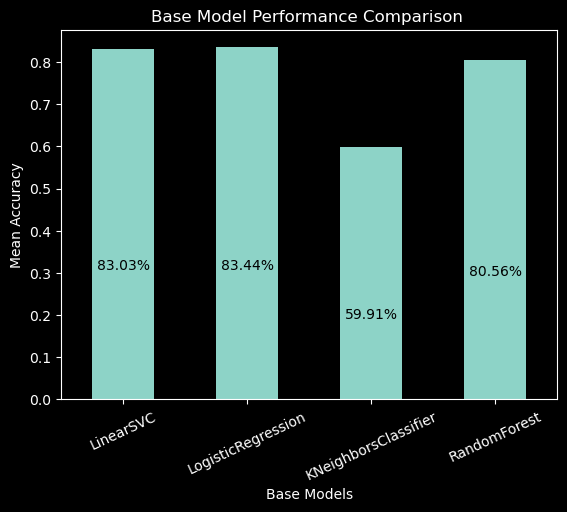

In [32]:
# Let's plot that now
bar = pd.DataFrame(model_scores, index=["Mean Accuracy"]).T.plot.bar(
    xlabel="Base Models",
    ylabel="Mean Accuracy",
    title="Base Model Performance Comparison ",
    legend=False,
)

# Tweaking the x-tick labels rotation
plt.xticks(rotation=25)

# Adding bar labels

plt.bar_label(
    bar.containers[0],
    fmt=lambda x: f"{x*100:.2f}%",
    label_type="center",
    padding=-30,
    color="black",
)

plt.show()

We can see `LinearSVC`, `LogisticRegression` & `RandomForest` are performing better!!

Let's Choose all three as base models, and discard `KNN` ***(It isn't fitting well on training data! cause i haven't scaled the features as required in KNN - a distance based algorithm)***



--- 
### Now, How we can improve??

#### Hyperparameter tuning!

Now, we've 3 base models, all are performing good, we can further improve them using ***hyperparameter tuning*** with the help of methods like fitting model `RandomizedSearchCV` and `GridSearchCV`.

`GridSearchCV` is computationally expensive on these many models, so let's use `RandomizedSearchCV` for now! to select the best fitting model of them!!


Before it, we have to find which settings ***Hyperparameters*** we can tune and are crucial to improve the performances of these models!

Remember, We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, We could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

Let's find about our model's important hyperparameters on the Official docs!

[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#linearsvc), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)! let's see what we can tune about these models in order to increase performance.

In [33]:
# Hyperparameter Combinations for these models to be tuned!

# Different LinearSVC hyperparameters


grid_linearSVC = {
    "C": np.logspace(-1, 3, 20),  # Use a log scale for C to cover a wide range
    "loss": ["squared_hinge"],  # Only 'squared_hinge' is supported when dual=False
    "penalty": ["l2"],  # Only 'l2' is supported when dual=False
    "tol": [1e-4, 1e-3, 1e-2, 1e-1],  # Add tolerance values
    "dual": [False],
}

# Parameters for Logistic Regression
grid_logistic_regression = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    "max_iter": [1000, 1200, 1400],
}

# Different RandomForestClassifier hyperparameters
grid_random_forest = {
    "n_estimators": np.arange(10, 300, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}


# This are potential parameters that can increase the performance of our Model!
# We can find a grid of good parameters just by doing a fair bit of research on what they really mean!

#### Now, let's use `RandomizedSearchCV` first, before using `GridSearchCV`

In short:
* `RandomizedSearchCV` - tries `n_iter` sample combinations of hyperparameters and saves the best. ***(Quick & Efficient)***
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best. ***(Computationally Expensive)***

Both methods will use `Cross-validation` to evaluate individual model's performance.

<img src="./Images/sklearn-cross-validation.png" width=50%>

Now let's use `RandomizedSearchCV` to try and tune our models one by one!

---
First let's tune `LinearSVC`.

We'll pass it the different hyperparameters from `grid_linearSVC` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

We'll use default classification metric to test i.e. ***Accuracy***


In [34]:
# Setup random seed
np.random.seed(77)

# search hyperparameters for LinearSVC randomly

rs_linearSVC = RandomizedSearchCV(
    LinearSVC(),
    grid_linearSVC,
    n_iter=20,  # 20 combinations to try!
    cv=5,  # Will use stratified-K-fold CV
    verbose=2,
)

# Fit RandomizedSearchCV
rs_linearSVC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.6951927961775606, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.6951927961775606, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.6951927961775606, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.6951927961775606, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.6951927961775606, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=1000.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=1000.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=1000.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=1000.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=1000.0, dual=False, loss=

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03]),
                                        'dual': [False],
                                        'loss': ['squared_hinge'],
                                        'penalty': ['l2'],
                                        'tol': [0.0001, 0.001, 0.01, 0.1]},
                   verbose=2)

In [35]:
# Let's see our best fitted hyperparameters
rs_linearSVC.best_params_

{'tol': 0.001,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'dual': False,
 'C': 33.59818286283781}

In [36]:
# And What's the best score for these hyperparameters combination?!
rs_linearSVC.best_score_

0.8426020408163264

Great!! We've improved our `LinearSVC()` model performance!! It's now ***1.3% better now*** *(at least on this run)*


Now let's tune our next 2 models - `LogisticRegression()` and `RandomForestClassifier()` with the same `RandomizedSearchCV()` technique.

In [37]:
# Setup random seed
np.random.seed(77)

# Setup RandomizedSearchCV for LogisticRegression
rs_logistic_regression = RandomizedSearchCV(
    LogisticRegression(), grid_logistic_regression, cv=5, n_iter=20, verbose=2
)

# Let's fit configured RandomizedSearchCV with our training data
rs_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=29.763514416313132, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.0885866790410082

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 1200, 1400],
                                        'solver': ['liblinear']},
                   verbose=2)

In [38]:
# Best parameters of tuned LogisticRegression
rs_logistic_regression.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 0.615848211066026}

In [39]:
# Best score of tuned LogisticRegression
rs_logistic_regression.best_score_

0.8385204081632652

Almost **0.5% Improvement**, let's tune last `RandomForestClassifier()` model!

In [40]:
# Setup random seed
np.random.seed(77)

# Setup RandomizedSearchCV
rs_random_forest = RandomizedSearchCV(
    RandomForestClassifier(), grid_random_forest, cv=5, n_iter=20, verbose=2
)


# Let's fit the training data
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260])},
                   verbose=2)

In [41]:
# Best parameters of tuned RandomForestClassifier
rs_random_forest.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [42]:
# Best score of our tuned RandomForestClassifier
rs_random_forest.best_score_ # Great 3% Improvements!!

0.8345238095238097

In [43]:
# Store RandomizedSearchCV Scores in a dictionary
rs_model_scores = {
    "rs_linearSVC": rs_linearSVC.best_score_,
    "rs_logistic_regression": rs_logistic_regression.best_score_,
    "rs_random_forest": rs_random_forest.best_score_,
}

In [44]:
# Let's see our previous performance Base Model scores
model_scores

{'LinearSVC': 0.8302721088435374,
 'LogisticRegression': 0.8343537414965987,
 'KNeighborsClassifier': 0.59906462585034,
 'RandomForest': 0.8056122448979591}

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `LinearSVC` and `LogisticRegression`. Also a bit of improvement in the `RandomForestClassifier` (3%).

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LinearSVC` & `LogisticRegression` are pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

#### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.


**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

In [45]:
# We have the following Hyperparameter Grids for LinearSVC and LogisticRegression
# Now, GridSearchCV will try and cross-validate every possible combination of hyperparameters

# LinearSVC & LogisticRegression grid
print(f"{grid_linearSVC = } \n\n {grid_logistic_regression = }")

grid_linearSVC = {'C': array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03]), 'loss': ['squared_hinge'], 'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01, 0.1], 'dual': [False]} 

 grid_logistic_regression = {'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['liblinear'], 'max_iter': [1000, 1200, 1400]}


In [46]:
# Setup random seed
np.random.seed(77)

# Setup GridSearchCV
gs_linearSVC = GridSearchCV(
    estimator=LinearSVC(), param_grid=grid_linearSVC, cv=5, verbose=2
)

# Let's fit `GridSearchCV` to find best hyperparameter combination
gs_linearSVC.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=0.001; total time=   0.0s
[CV] END C=0.1, dual=False, loss=

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03]),
                         'dual': [False], 'loss': ['squared_hinge'],
                         'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01, 0.1]},
             verbose=2)

In [47]:
# Best found hyperparameters!
gs_linearSVC.best_params_

{'C': 1.1288378916846888,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'tol': 0.01}

In [48]:
# Let's find new best score!!
gs_linearSVC.best_score_

0.8467687074829933

In this case, we get tiny improvements ***(.4%)*** as before since our grid only has a maximum of 80 different hyperparameter combinations.

**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

Let's fine tune `LogisticRegression` now!!

In [49]:
# Setup random seed
np.random.seed(77)

# Setup Grid Search for logistic regression
gs_logistic_regression = GridSearchCV(
    LogisticRegression(), grid_logistic_regression, cv=5, verbose=2
)


# Fit Grid Search
gs_logistic_regression.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1200, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1200, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1200, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1200, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1200, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1400, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1400, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1000, 1200, 1400],
                         'solver': ['liblinear']},
             verbose=2)

In [50]:
# Best Parameters
gs_logistic_regression.best_params_


{'C': 0.615848211066026, 'max_iter': 1000, 'solver': 'liblinear'}

In [51]:
# Best Score
gs_logistic_regression.best_score_


0.8385204081632652

In [52]:
# Storing GridSearchCV model scores
gs_model_scores = {
    "gs_linearSVC": gs_linearSVC.best_score_,
    "gs_logistic_regression": gs_logistic_regression.best_score_,
}

It's same results as before!! **same** Logistic Regression performance!

Potential reasons are 
- We have less number of total combinations for hyperparameters.
- Our data is insufficient *(only 242)* for more robust training.
- Maybe we reached upper limit with chosen resources i.e. *data, models, hyperparameters*.
- Can we have more high quality data??

Let's admit these tuned models and take our `LinearSVC` tuned model to final Evaluations metrics & evaluate it **beyond Accuracy**.

---

### Final Model Evaluation

#### Evaluating a Classification model beyond Accuracy!

- Now, first let's see, how our cross-validated score has been increased by Hyperparameter tuning!!
- And how we filtered selected models!

In [53]:
# Base Models
model_scores


{'LinearSVC': 0.8302721088435374,
 'LogisticRegression': 0.8343537414965987,
 'KNeighborsClassifier': 0.59906462585034,
 'RandomForest': 0.8056122448979591}

In [54]:
# RandomizedSearchCV
rs_model_scores


{'rs_linearSVC': 0.8426020408163264,
 'rs_logistic_regression': 0.8385204081632652,
 'rs_random_forest': 0.8345238095238097}

In [55]:
# GridSearchCV
gs_model_scores


{'gs_linearSVC': 0.8467687074829933,
 'gs_logistic_regression': 0.8385204081632652}

Now we've got a tuned model, let's evaluate it on different classification metrics!

***Remember:*** We have our **Test Dataset** untouched & by evaluating on this test set, we'll have a robust estimation of our model's performance.

##### We want following metrics, with our **Test dataset** to quantify performance estimate!!

* ROC curve and AUC score - [`RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) 
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

To access them, we'll have to use our model to make predictions on the test set. We can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

These metrics needs us to calculate ***Truth Labels*** and ***Predicted labels***.

We'll do that on our *Test Dataset* with already tuned `LinearSVC` Model.

In [56]:
# Let's predict Test Data with our LinearSVC model
y_preds = gs_linearSVC.predict(X_test)

# Our predictions
y_preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
# Let's also see the actual truth labels
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

- Time to Evaluate our model, on above discussed metrics!

- ROC Curve - understanding how your model is performing by comparing the true positive rate to the false positive rate.


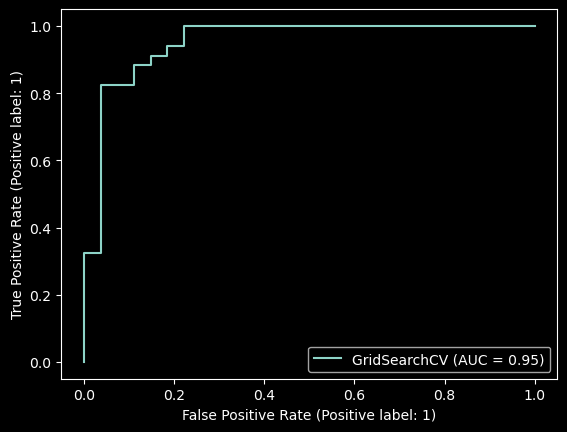

In [58]:
# Let's use sklearn to calculate and display "(ROC) Receiver Operating Characteristics Curve"
# It will also show us the AUC score of our model

RocCurveDisplay.from_estimator(gs_linearSVC, X_test, y_test)

Ohh... Goodness, it's a very good score (AUC=0.95) (at least for me!), now let's visualize it's `Confusion Matrix`

Remember the anatomy of a Confusion matrix!

<img src="https://hackernoon.imgix.net/images/BYWRsHWtmGOUC5N4fwNhMqohMAC3-c9c3gxs.png" width=30% alt="Anatomy">

In [59]:
# Let's calculate the confusion matrix
from sklearn.metrics import  confusion_matrix

conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat) # Indeed good results

[[21  6]
 [ 0 34]]


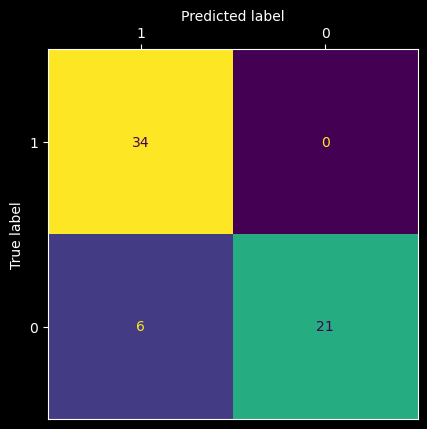

In [60]:
# Visualizing our Confusion Matrix
# `from_estimator` method expects a trained ML model to test on given data!

ConfusionMatrixDisplay.from_estimator(
    gs_linearSVC,
    X_test,
    y_test,
    labels=[1, 0],  # Based on above anatomy
    colorbar=False,
)

# Customize based on above anatomy!
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.show()


So, here we got no ***False Negative (FN)***, in our specific case it means -

- ***FN*** - Predicting ***not a disease*** when actually the person is **Diseased** | This can result in more severity of the disease over time, our model prevents it greatly!

But with ***False Positive (FP)***, we have more wrong predictions!

- ***FP*** - This means we are more likely to misclassify ***Healthy people as diseased!*** I think it's acceptable for me!

And our overall predictions are great! They will result in good Precision, recall & f1 scores!

Let's see them using a ***classification report*** -

In [61]:
# Getting a Classification Report
# A combination of classification metrics!

print(
    classification_report(y_test, y_preds)
)


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.85      1.00      0.92        34

    accuracy                           0.90        61
   macro avg       0.93      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61



Here we knew, Our model performs Good Overall! Let's understand what they all are!?

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.

* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a ***recall of 1.0.***
  
* **F1 score** - Harmonic mean of precision and recall. A perfect model achieves an F1 score of 1.0.
  
* **Support** - The number of samples each metric was calculated on.
  
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t consider class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


Remember our best found parameters for ***LinearSVC*** ?

In [62]:
# Best Hyperparameters till now
gs_linearSVC.best_params_

{'C': 1.1288378916846888,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'tol': 0.01}

##### ***Important -***

Now, I was told to calculate cross-validated classification metrics on the ***test dataset*** with our best model parameters.

But remember, cross-validation trains/tests a model on ***multiple splits of the dataset*** and it may not be necessary.

Cross-validation could lead to data leakage or overfitting to the test set.

Hence, 👍***Rule of Thumb:*** cross-validation is the concept for validating a model during training & ***shouldn't be used*** for Final evaluations. **[Read more](https://www.fast.ai/posts/2017-11-13-validation-sets.html)**

We already calculated good metics, there are few more robust techniques like - ***Bootstrapping, Sub-sampling*** etc.


For now, let's calculate precision, recall & f1-score separately to compare them visually!!

In [63]:
# Let's extract our best model till now | Found through GridSearchCV
best_linearSVC = gs_linearSVC.best_estimator_

best_linearSVC

LinearSVC(C=1.1288378916846888, dual=False, tol=0.01)

In [64]:
# Calculate all remaining metrics
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1_metric = f1_score(y_test, y_preds)


# Let's see
accuracy, precision, recall, f1_metric

(0.9016393442622951, 0.85, 1.0, 0.9189189189189189)

- Let's compare our classification metrics visually

In [65]:
# Create a DataFrame to organize
final_evaluation = pd.DataFrame(
    [accuracy, precision, recall, f1_metric],
    index=["Accuracy", "Precision", "Recall", "F1_Score"],
    columns=["Score"],
)

final_evaluation

,Score
Accuracy,0.901639
Precision,0.850000
Recall,1.000000
F1_Score,0.918919


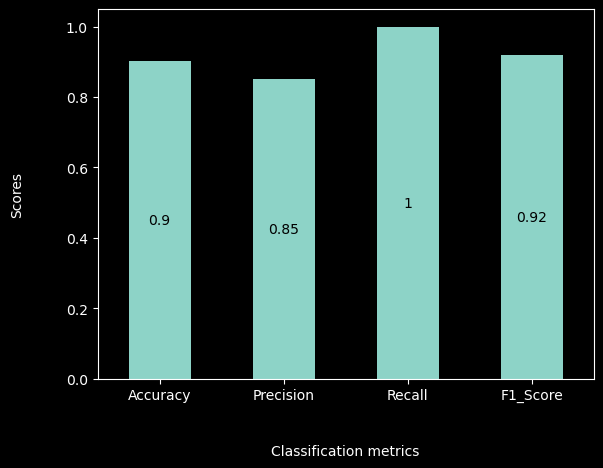

In [66]:
# Visualize
bars = final_evaluation.plot.bar(
    legend=False,
    xlabel="Classification metrics",
    ylabel="Scores",
    rot=0, 
)

# Customize
plt.bar_label(
    bars.containers[0],
    fmt="%1.2g",
    label_type="center",
    color="black"
)

plt.xlabel("Classification metrics", labelpad=30)
plt.ylabel("Scores", labelpad=30)

plt.show()

- Finally, we have all the ***metrics visualized!*** And our model is performing excellent!

- Now, our model evaluation techniques list want us to Explore Features importance.

### Model based - Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In our case, Classifying heart disease using a patient's medical characteristics, which characteristics contribute most to a ***model predicting*** whether someone has heart disease or not

It differs for *different ML models* because how each model finds patterns in data is different, how a model judges ***how important*** those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can always do your own research for specific models!

We'll learn to calculate ***Feature importance*** for our best model - ***LinearSVC***

To do so, we'll use the `coef_` attribute. Looking at [Here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), the `coef_` attribute of `LinearSVC` is the coefficient of the features in the decision function.

We can access the `coef_` attribute of our best fine-tuned model i.e. `best_linearSVC`.

In [71]:
# let's check "coef_" of our linearSVC model
best_linearSVC.coef_

array([[ 0.00565908, -0.43705549,  0.27375031, -0.00451959, -0.00073046,
        -0.00922889,  0.16943671,  0.00976896, -0.25762398, -0.23245303,
         0.07517057, -0.23067541, -0.26154895]])

Ok, these are the feature's ***coefficients*** for our data! But we don't know which refers to which?!

Let's see their ***corresponding features*** in our `X_train` dataset

In [75]:
# Training Features

X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

- Let's map them together to ***visualize*** their Importance!

In [119]:
# Creating a Pandas DataFrame

imp_features = pd.DataFrame(
    data=best_linearSVC.coef_.T, index=X_train.columns, columns=["Coef_"]
)

imp_features


,Coef_
age,0.005659
sex,-0.437055
cp,0.273750
trestbps,-0.004520
chol,-0.000730
fbs,-0.009229
restecg,0.169437
thalach,0.009769
exang,-0.257624
oldpeak,-0.232453


- Now, time to visualize their importance! We will use ***horizontal bar chart*** to do so!

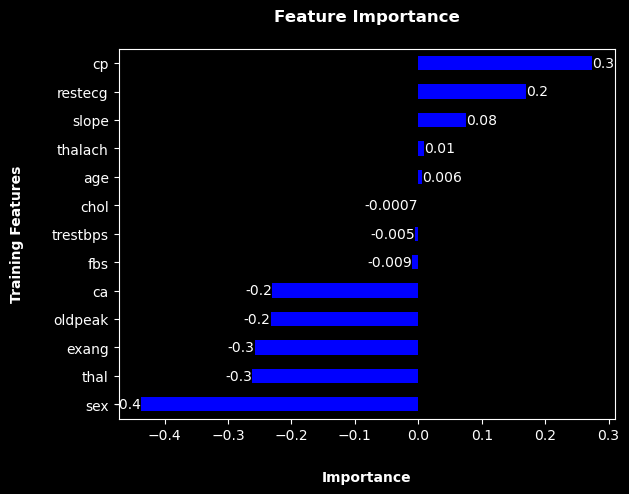

In [200]:
bar = imp_features.sort_values(by="Coef_").plot.barh(
    legend=False,
    color="blue"
)

# Customize
bar.set_xlabel(xlabel="Importance", labelpad=20, weight="bold")
bar.set_ylabel(ylabel="Training Features", labelpad=20, weight="bold")
bar.set_title("Feature Importance", pad=20, weight="heavy")
bar.bar_label(bar.containers[0], fmt="%1.1g")

plt.show(bar)

Here, some feature importances are negative & some are positive!!

And the bigger the bar, the far the value from 0 - The Greater the impact of the Feature on our model's predictions!

Negative features shows negative impact while positive features does positively affect our model's predictions!


For example, the `sex` attribute has a negative value, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [206]:
# Compare using cross-tab

pd.crosstab(heart_disease_df.sex, heart_disease_df.target)

target,0,1
sex,,
0,24,72
1,114,93


As the `sex` value increases, the ratio of people who have heart disease and who don't goes down! ***target decreases***

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive Feature?

In [211]:
pd.crosstab(heart_disease_df.cp, heart_disease_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Here we can see -

- As the cp (Chest Pain increases), our ratio to "1 : 0" (diseased over non-diseased) also increases! Hence a positive Impact.


#### How can it help us?

This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest importance) as well as where it's not (lowest imp.). 

Doing this has a few benefits:
1. **Finding out more** - If some of the feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
   
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems.
   
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## 6. Experimentation

Finally, did you realized?

As you might've guessed, the whole thing is experimentation.

From trying different models, to ***tuning different models*** to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on ***forever.***

So did we achieved our evaluation metric?

Remember we defined one in step 3.

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model got is ***90.1%*** 👍

But i still think, we have achieved 👏 a lot with that small amount of data. And I'm really considering this a win!🥇

#### What next?

You might be wondering, what happens when the evaluation metric doesn't get hit?

- Is everything we've done wasted? ***No.***

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of `LinearSVC`) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data? - *Maybe yes*

* Could you try a better model? If you're working with structured data, you might want to look into [CatBoost](https://catboost.ai/) or [XGBoost](https://xgboost.ai/). - *Yeah!! We will see them in future.*

* Could you improve the current models (beyond what we've done so far)? - *i think it's difficult, we have done a lot with available resources!*
* If your model is good enough, how would you export it and share it with others? - *Let's do that below!*

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.



--- 

#### Finally, Let's save our *"Best Model"* & probably share it!

- we will use "Joblib" to save our model, see [model persistence.](https://scikit-learn.org/stable/modules/model_persistence.html)
- Joblib looks best for us, let's use it.

In [214]:
# Import joblib
import joblib as jbl

jbl.dump(best_linearSVC, filename="./Heart_disease_LinearSVC_90%")

['./Heart_disease_LinearSVC_90%']

In [215]:
# Let's test to load our model again!

loaded_linearSVC = jbl.load("./Heart_disease_LinearSVC_90%")

loaded_linearSVC.score(X_test, y_test) # Great

0.9016393442622951

### Here, our project completes, we got to learn a lot! And maybe it's great to achieve 90% accuracy! Let's Celebrate🥳🙌